In [65]:
import numpy as np 
from scipy.io.wavfile import read, write  #para leer y guardar archivos de audio formato wav
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,fftfreq
from scipy import signal
import pywt

**Guarde en un vector  la señal o un canal del audio disponible en la carpeta correspondiente según inicial de su apellido que se encuentra en el siguiente link. Calcule la cantidad de muestras de la señal, la frecuencia de muestreo y la duración en segundos de la señal. Grafique la señal en funcion del tiempo. Realice un analisis de la señal según las frecuencias (en Hertz). Justifique y expláyese, qué tecnica utiliza y por qué.**

In [66]:
# leo el archivo y lo almaceno en una variable
audio = read('audio.wav')
# print(audio)
# almaceno el audio en una variable
x1 = audio[1]

# cantidad de muestras de al senal
Mx1 = len(x1)
# frecuencia de muestreo
fmx1 = audio[0]
# duracion en segundos
# si 10000 muestras --- 1s
#    60000 muestras --- x =
lenx1 = Mx1/fmx1  

print("Cantidad de muestras: ", Mx1)
print("Frecuencia de muestreo: ", fmx1)
print("Duracion en segs.: ", lenx1, "[s]")

Cantidad de muestras:  60000
Frecuencia de muestreo:  10000
Duracion en segs.:  6.0 [s]


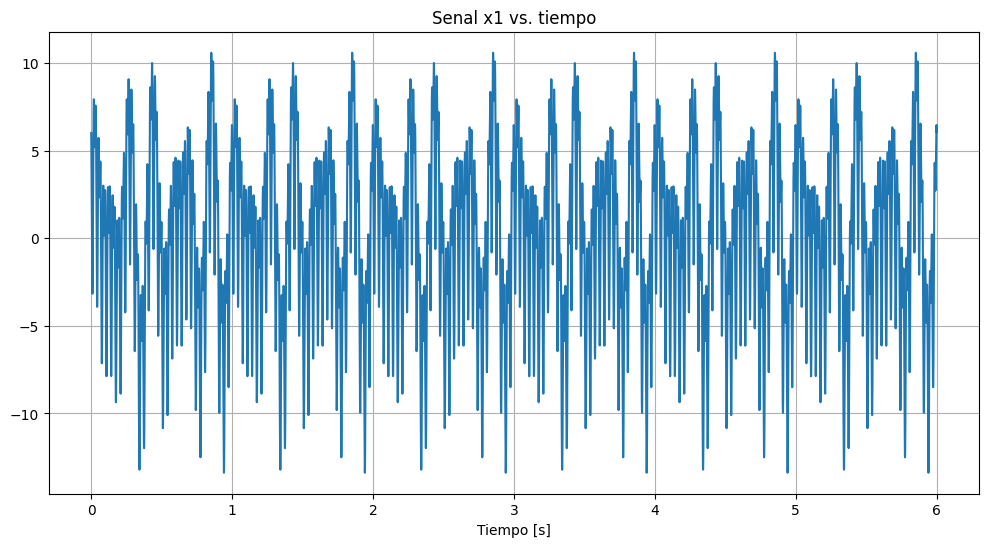

In [67]:
# grafico la senal en funcion del tiempo
# para eso se genera el vector de tiempos discretizados
# periodo de muestreo
pmx1 = 1/fmx1
tx1 = np.arange(0,6,pmx1)

plt.figure(figsize=(12,6))
plt.plot(tx1,x1)
plt.grid(True)
plt.title("Senal x1 vs. tiempo")
plt.xlabel("Tiempo [s]")

plt.show()

Para anlizar la senal en frecuencia se procede a realizar la DFT.N de la senal con N = Mx1 cantidada de muestras.

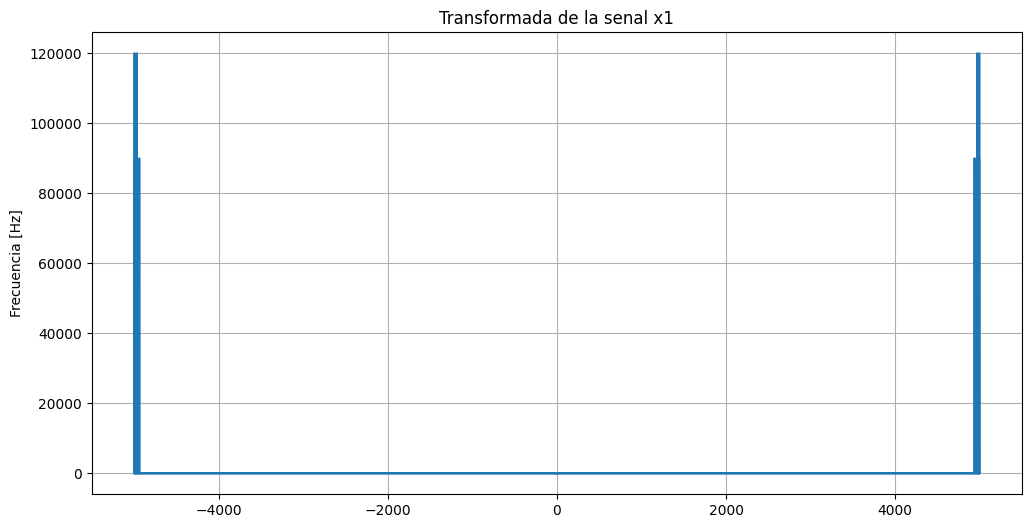

In [68]:
N = Mx1
# se genera el vector de frecuencias en Hz.
k = fftfreq(N,1/fmx1)

# se realiza la transformada discreta
DFTx1 = fft(x1,N)

plt.figure(figsize=(12,6))
plt.plot(k,fftshift(abs(DFTx1)))
plt.grid(True)
plt.title("Transformada de la senal x1")
plt.ylabel("Frecuencia [Hz]")

plt.show()

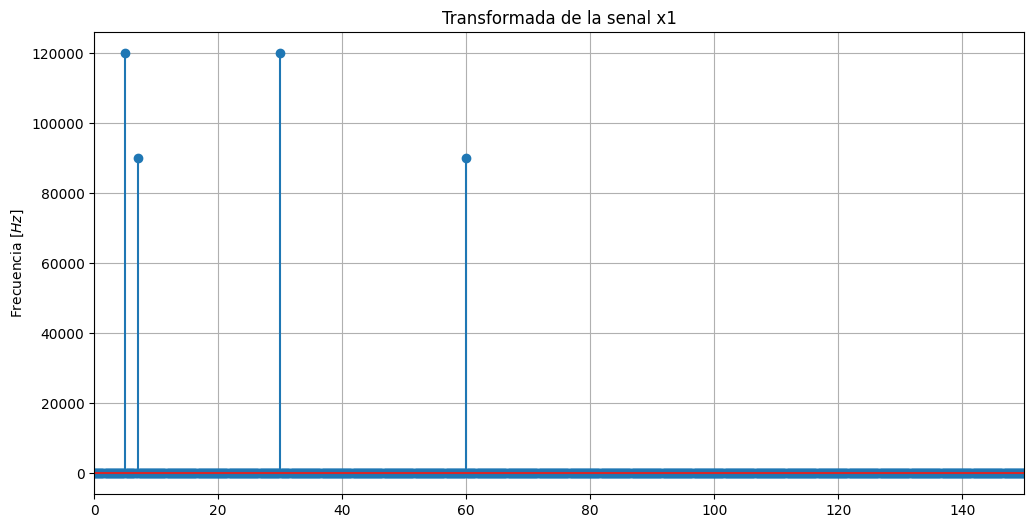

In [69]:
# dado que no se ve en detalle, se procede a graficar con mas "zoom" la transformada
plt.figure(figsize=(12,6))
plt.stem(k[0:N],abs(DFTx1[0:N]))
plt.grid(True)
plt.title("Transformada de la senal x1")
plt.ylabel("Frecuencia $[Hz]$")
plt.xlim(0,150)

plt.show()

Para analizar la senal en frecuencia utilizo la DFT.N dado que es una forma rapida para observar los valores de la senal en el dominio frecuencial. 
En el dominio frecuencial se pueden observar varios componentes frecuenciales. Esto quiere decir que, si bien no sabemos a priori en que instante de tiempo suceden, la senal esta compuesta por distinas frecuencias. Es importante aclarar que esta herramienta no me permite concluir definitivamente si se trata de una senal estacionaria o no, pero si me da una pista de como se comporta en frecuencia.
Con el analisis realizado, pienso que podria tratarse de una senal estacionaria, dado que se ven picos bien separados y definidos.

**Realice un analisis detallado de la señal según tiempo y frecuencia (en Hertz), expláyese, ¿Considera que la señal es estacionaria?, justifique claramente. Para el análisis utilice dos resoluciones diferentes (adecuadas ambas o por lo menos una). compárelas y cotéjelas. Son coherentes? por qué? considera que una es más adecuada que la otra para el problema?**

Para analizar la senal en tiempo y frecuencia en simultaneo se procede utilizando STFT (short time fourier transform). 
Para este analisis se utilizaran dos ventanas diferentes con distintas resoluciones, para comparar.

[]

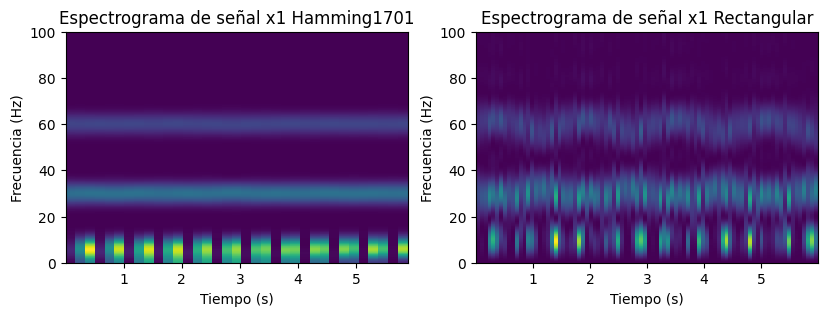

In [70]:
# se definen dos ventanas en el dominio temporal: una de hamming y otra rectangular
vhamming = signal.hamming(1701)
vrect = np.ones(701)

# se calcula la transformada de fourier a tiempo corto con las dos ventanas
f1h, t1h, Sxx1h = signal.spectrogram(x1,fs=fmx1, window=vhamming,nfft=N, noverlap=20) #espectograma sin solape
f1b, t1b, Sxx1b = signal.spectrogram(x1,fs=fmx1, window=vrect,nfft=N, noverlap=20) #espectograma sin solape

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.pcolormesh(t1h, f1h,Sxx1h)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de señal x1 Hamming1701')
plt.ylim(0,100)

plt.subplot(132)
plt.pcolormesh(t1b, f1b,Sxx1b)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de señal x1 Rectangular')
plt.ylim(0,100)

plt.plot()

Por el grafico de la senal $x1$ vs. el tiempo, noto que la senal tiene un comportamiento bastante parejo en el tiempo. Es decir, no parece oscilar mas tapido en un instante que en otro. Es por este motivo que para el analisis tiempo-frecuencia con STFT decidi sacrificar un poco de resolucion temporal (con un $\Delta t$ grande) para poder observar mejor a la imagen en frecuencia.
Para este analisis se usaron dos ventanas de distintas resoluciones
- Ventana de Hamming con un tamano temporal de 1701
- Ventana rectangular con un tamano temproal de 701

Considero que la ventana de Hamming es mas conveniente para este analisis dado que tiene una mejor relacion en su comportamiento en ambos dominios tanto frecuencial como temporal: en tiempo se asemeja a la ventana rectangular y en frecuencia se asemeja al impulso, con una mejor cantidad de lobulos laterales. 
De manera distinta, la ventana rectangular tiene un comportamiento ideal en el dominio temporal, pero al pasar al dominio frecuencial, deja una gran cantidada de lobulos (como se ve en el segundo espectrograma, hay una mayor cantidad de lobulos y una menor resolucion, por mas que se igualen los tamanos en el tiempo).
Por estos motivos considero que la ventana de Hamming es mas adecuada. 

Considero que se trata de una senal estacionaria. En complemento con el analisis en frecuencia realizado con la DFT.N, al ver el espectrograma se observan bandas frecuenciales horizontales. si bien se ven cortes que dificultan la observacion, esto se debe a la alta resolucion temporal elegida para obtener una mejor imagen en frecuencia. De tratarse de una senal no estacionaria, se verian escalones (crecientes o decrecientes) en las bandas frecuenciales. Es decir, no tendrian un comportamiento horizontal, mas bien se verian variaciones en las bandas frecuenciales.

Tambien se ve el efecto de los lobulos laterales en ambos espectrogramas.
Se observa tambien que hay puntos mas brillosos en ambos espectrogramas, denotando los intantes de tiempo donde aparece mas esa frecuencia.

**Grafique  dos Onditas y muestre sus propiedades: una de las dos util para analisis CWT y la otra util para analisis DWT.**

In [71]:
from scipy import signal
from scipy.signal import qmf, daub  #para transformada Ondita
import pywt  #para transformada Ondita

Ondita para CWT:

ContinuousWavelet mexh
  Family name:    Mexican hat wavelet
  Short name:     mexh
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False


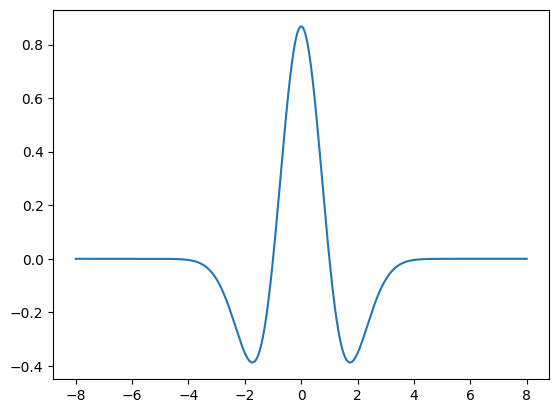

4096 muestras 4096


In [72]:
# se elige una wavelet para CWT y se la almacena en una variable
wavelet = pywt.ContinuousWavelet('mexh')

# se muestran las propiedades
print(wavelet)
r=12
[psi, x] = wavelet.wavefun(r)

# se grafica la wavelet
plt.plot(x,psi)
plt.show()

print(len(x),'muestras',2**r)

Ondita para DWT:

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


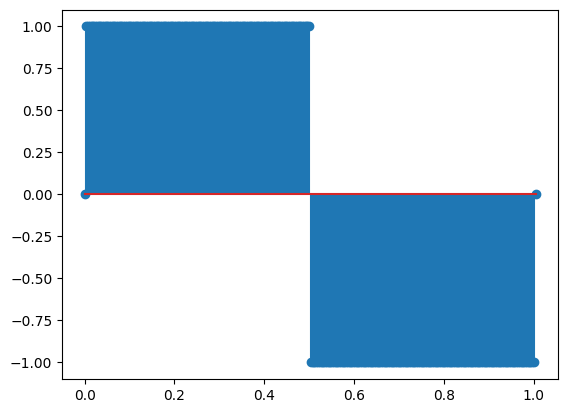

258 muestras 4096


In [73]:
# se almacena la wavelet para DWT en una variable
wavelet = pywt.Wavelet('haar')
# se almacenan los datos para graficar
phi,psi,x = wavelet.wavefun()

# se muestran las propiedades
print(wavelet)

# se grafica la wavelet
plt.stem(x,psi)
plt.show()
print(len(x),'muestras',2**r)